Hello
In this notebook i try to explore given  data and apply some visulization if possible. Dont forget to vote for me.

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018"))

# Any results you write to the current directory are saved as output.

['sample_submission_randomlabel.csv', 'test.json', 'validation.json', 'train.json']


In [10]:
train = pd.read_json('/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/train.json')
test = pd.read_json('/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/test.json')
val = pd.read_json('/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/validation.json')
sam_sub = pd.read_csv('/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/sample_submission_randomlabel.csv')

In [11]:
train.head()

,images,annotations
0,{'url': ['https://img13.360buyimg.com/imgzone/...,"{'image_id': 1, 'label_id': 5}"
1,{'url': ['http://www.tengdakeli.cn/350/timg01/...,"{'image_id': 2, 'label_id': 5}"
2,{'url': ['https://img13.360buyimg.com/imgzone/...,"{'image_id': 3, 'label_id': 5}"
3,{'url': ['http://img4.tbcdn.cn/tfscom/i1/28554...,"{'image_id': 4, 'label_id': 5}"
4,{'url': ['http://a.vpimg4.com/upload/merchandi...,"{'image_id': 5, 'label_id': 5}"


In [12]:
val.head()

,images,annotations
0,{'url': ['http://www.ghs.net/public/images/fb/...,"{'image_id': 1, 'label_id': 38}"
1,{'url': ['https://img.alicdn.com/imgextra/TB2c...,"{'image_id': 2, 'label_id': 63}"
2,{'url': ['http://static-news.17house.com/web/n...,"{'image_id': 3, 'label_id': 33}"
3,{'url': ['http://img000.hc360.cn/g6/M07/CB/88/...,"{'image_id': 4, 'label_id': 126}"
4,{'url': ['https://img.alicdn.com/imgextra/T1sL...,"{'image_id': 5, 'label_id': 18}"


In [13]:
test.head()

,images
0,{'url': ['https://img13.360buyimg.com/imgzone/...
1,{'url': ['http://img35.ddimg.cn/79/22/12581687...
2,{'url': ['https://img.alicdn.com/imgextra/TB19...
3,{'url': ['https://img13.360buyimg.com/imgzone/...
4,{'url': ['http://img4.99114.com/group1/M00/7D/...


In [14]:
sam_sub.head()

,id,predicted
0,1,57
1,2,74
2,3,52
3,4,54
4,5,39


In [15]:
train.columns

Index(['images', 'annotations'], dtype='object')

In [16]:
train['image_id'] = train.annotations.map(lambda x: x['image_id'])
train['label_id'] = train.annotations.map(lambda x: x['label_id'])
train['url'] = train.images.map(lambda x: x['url'][0])
train.drop(columns=['annotations', 'images'], inplace=True)
train.head()

,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...


In [17]:
train.isnull().sum()

image_id    0
label_id    0
url         0
dtype: int64

In [18]:
val['image_id'] = val.annotations.map(lambda x: x['image_id'])
val['label_id'] = val.annotations.map(lambda x: x['label_id'])
val['url'] = val.images.map(lambda x: x['url'][0])
val.drop(columns=['annotations', 'images'], inplace=True)
val.head()

,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...
2,3,33,http://static-news.17house.com/web/news/201602...
3,4,126,http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNVJ...
4,5,18,https://img.alicdn.com/imgextra/T1sLtpFH8aXXXX...


In [19]:
val.isnull().sum()

image_id    0
label_id    0
url         0
dtype: int64

In [20]:
# test['image_id'] = test.annotations.map(lambda x: x['image_id'])
# test['label_id'] = test.annotations.map(lambda x: x['label_id'])
test['url'] = test.images.map(lambda x: x['url'][0])
test.drop(columns=[ 'images'], inplace=True)
test.head()

,url
0,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg
2,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...
3,https://img13.360buyimg.com/imgzone/jfs/t16498...
4,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...


In [21]:
test.isnull().sum()

url    0
dtype: int64

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= train.url[50],width=200,height=200)

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))


In [24]:
urls = train['url'][15:30]
display_category(urls, "")


In [25]:
urls = test['url'][15:30]
display_category(urls, "")


In [26]:
urls = val['url'][15:30]
display_category(urls, "")


In [27]:
train.label_id.value_counts().sort_values(ascending=False).head()

20     3996
42     3973
92     2666
12     2609
125    2598
Name: label_id, dtype: int64

The top most labels are shown above, let us display them

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


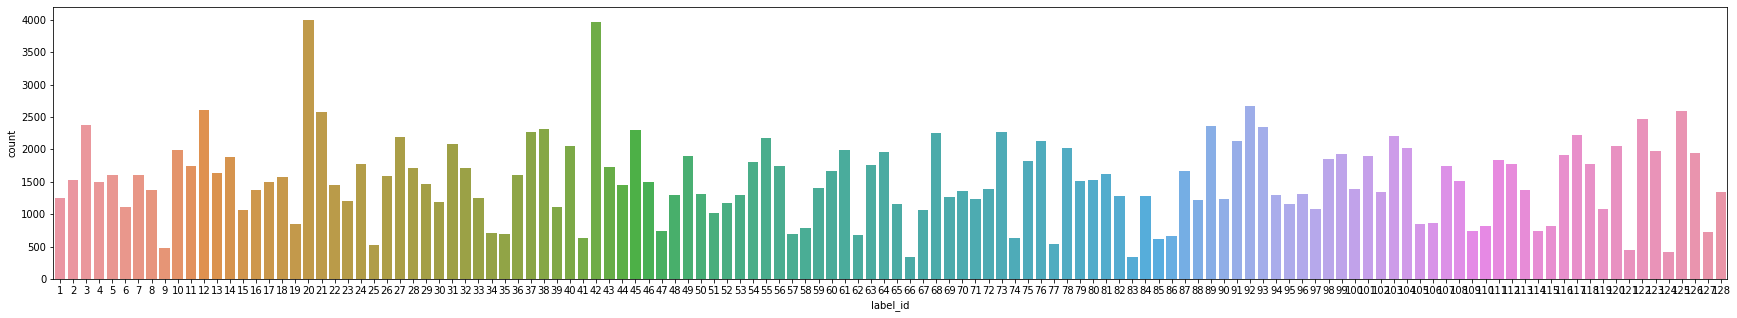

In [29]:
plt.figure(figsize=(30,5))
sns.countplot(train.label_id)
plt.show()

In [30]:
(train.url[11])

'http://d8.yihaodianimg.com/N10/M09/35/A3/ChEi21ZD8omAGcyNAAN5x93OdSQ41401_360x360.jpg'

In [31]:
train.columns

Index(['image_id', 'label_id', 'url'], dtype='object')

In [32]:
a = train.label_id.unique()
a

array([  5, 104,  67,  15,  86, 120,   9,  74,  77, 101,   4,  99,  37,
        64,  28, 110,  59, 117,  79,  68,  32, 127, 106,  24,  97,  13,
        39,  62, 122,  89,  48, 105,  50,  55,  31,  73,   3,  30,  78,
       126,  23,  96, 107, 114,  98,  80,  57,  65, 123,  29,  54, 121,
        52, 115,  25,  90,  16,  21,  19,  81,  41,   7,   1,  83,   2,
       118,  12,  93,  70,   8,  26,  92,  53, 119,  14, 113,  33,   6,
        60,  85, 112, 109,  45,  91,  20,  22,  18,  36,  27,  82,  95,
        11,  51,  34, 103,  56, 108,  61,  84,  44,  10,  38, 125,  75,
        47, 124,  87,  49, 102,  46,  71,  58,  63,  94,  69,  42,  43,
       111,  17,  88,  76, 116,  35,  40, 128,  66, 100,  72])

In [33]:
from IPython.core.display import HTML 
from ipywidgets import interact
from IPython.display import display

%matplotlib inline

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category1(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))


In [35]:
urls = val['url'][15:30]
display_category1(urls,"")


so how can we proceed to solve this problem...any idea please comment below.
 
 **If you like my  notebook please vote for me.**
 
 more in pipeline, stay tuned.
 
 Thank you.